In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
cid = '0cad5195dfd04884b84ba221fe400bff'
secret = '212724fad9f6414fb40a0d2caf57f4ee'
scope = "playlist-modify-public"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
auth_manager = SpotifyOAuth(scope=scope, client_id=cid, client_secret=secret, redirect_uri="http://localhost")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager, auth_manager=auth_manager)

In [4]:
sadSong = "2BOqDYLOJBiMOXShCV1neZ"
happySong = "3koCCeSaVUyrRo3N2gHrd8"

featuresSadSong = sp.audio_features(sadSong)
featuresHappySong = sp.audio_features(happySong)

# print(featuresSadSong)
print("Features for 'Dancing On My Own' by Calum Scott:\n")
data = pd.DataFrame(featuresSadSong)
print(data.T)

Features for 'Dancing On My Own' by Calum Scott:

                                                                  0
danceability                                                  0.681
energy                                                        0.174
key                                                               1
loudness                                                     -8.745
mode                                                              1
speechiness                                                  0.0315
acousticness                                                  0.837
instrumentalness                                           0.000034
liveness                                                     0.0983
valence                                                       0.231
tempo                                                       112.672
type                                                 audio_features
id                                           2BOqDYLOJBiMOXShCV1ne

In [5]:
featureDataset = pd.read_csv('SpotifyAudioFeaturesApril2019.csv', header=0, skiprows=0)
featureDataset.head()
print(featureDataset.shape)

(130663, 17)


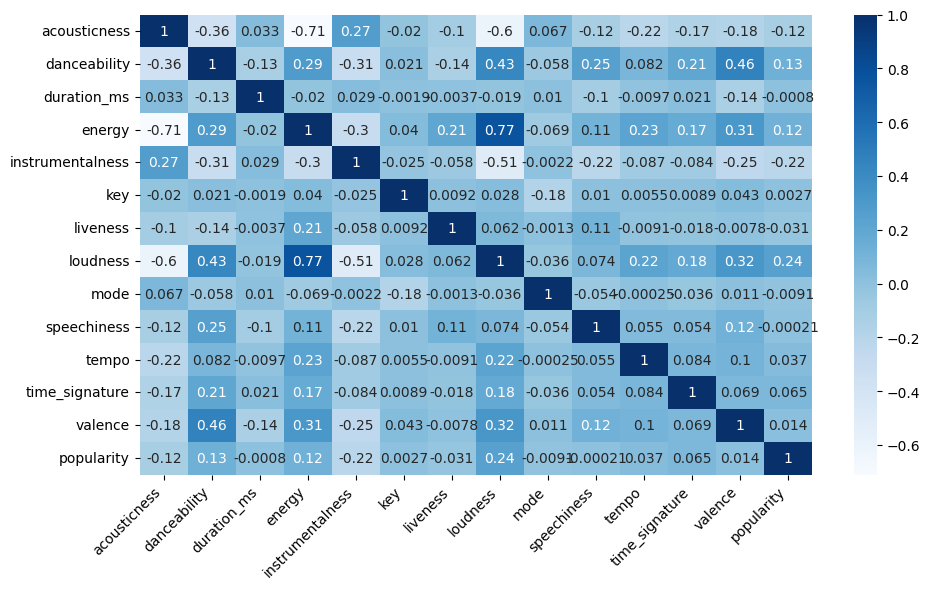

In [6]:
## Plot Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(featureDataset.iloc[:, 3:].corr(),cbar=True,annot=True,cmap='Blues')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Plot Histograms
# sns.histplot(featureDataset['instrumentalness'], bins=30, kde=True)  # kde=True adds a Kernel Density Estimate
# plt.title('Instrumentalness')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


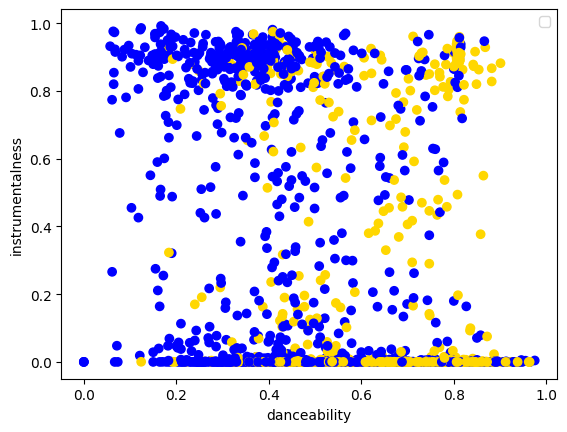

In [72]:
y = featureDataset[["valence"]].iloc[:2000]
colors = []
for i in y.values:
    if i >= 0.5:
        colors.append("gold")
    else:
        colors.append("blue")

plt.scatter(featureDataset["danceability"].iloc[:2000],featureDataset["instrumentalness"].iloc[:2000], color = colors)
plt.xlabel("danceability")
plt.ylabel("instrumentalness")
plt.legend()
plt.show()

In [29]:
X = featureDataset[["danceability","instrumentalness","energy","loudness","duration_ms","acousticness","key","liveness","loudness","mode","speechiness"
                    ,"tempo","time_signature","popularity"]]
y = featureDataset[["valence"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(104530, 14)
(104530, 1)
(26133, 14)
(26133, 1)


In [30]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation="tanh"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

C:\Users\jeana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.0025 - loss: 0.6872 - val_accuracy: 0.0025 - val_loss: 0.6862
Epoch 2/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.0026 - loss: 0.6865 - val_accuracy: 0.0025 - val_loss: 0.6871
Epoch 3/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0026 - loss: 0.6864 - val_accuracy: 0.0025 - val_loss: 0.6861
Epoch 4/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.0024 - loss: 0.6862 - val_accuracy: 0.0025 - val_loss: 0.6863
Epoch 5/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.0025 - loss: 0.6864 - val_accuracy: 0.0025 - val_loss: 0.6865
Epoch 6/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.0027 - loss: 0.6860 - val_accuracy: 0.0025 - val_loss: 0.6859
Epoch 7/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.0025 - loss: 0.6865 - val_accuracy: 0.0025 - val_loss: 0.6860
Epoch 8/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0024 - loss: 0